In [1037]:
# autoreload
%load_ext autoreload
%autoreload 2

# fix path
import sys
sys.path.append("/home/jxm/reverse-training")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1038]:
from utils.analysis import load_results_as_df
import os


HOME_DIR = "/home/jxm/reverse-training"
df = load_results_as_df(os.path.join(HOME_DIR, "results", "03-26-exp-leakage-5"))
df["seed_dataset_size"] = df["select_seed_dataset"].str.extract(r"(\d+)").astype(int)


Found 108 files in /home/jxm/reverse-training/results/03-26-exp-leakage-5/*.pkl
Filtered 0/108 results with no evaluation metrics
dict_keys(['data', 'time_elapsed', 'full_ot_distance', 'sinkhorn_distance', 'optimal_matching_relaxed_wmd', 'jaccard_overlap_examples', 'jaccard_overlap_vocabulary', 'containment_similarity_examples', 'containment_similarity_vocabulary', 'levenshtein_stats', 'discrete_ot_distance_levenshtein', 'discrete_ot_distance_jaccard', 'args', 'expert_evaluation_metrics', 'evaluation_metrics', 'total_time_in_evaluation'])


In [1039]:
import pandas as pd

pd.set_option('display.max_rows', None)

dv_cols = ["dataset", "select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"]

iv_cols = ["evaluation_best_eval_accuracy", "dataset_sinkhorn_distance", "dataset_full_ot_distance", "dataset_jaccard_overlap_vocabulary"]

# final_df = df[df["select_seed_dataset"] == "nq_500000"]

df.groupby(dv_cols)[iv_cols].mean().sort_values(
    by=["dataset","select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"], 
    ascending=False
)

evaluation_best_eval_accuracy  \
dataset       select_seed_dataset    select_full_dataset_size select_batch_fill_strategy                                  
ag_news_10000 ag_news_10000 nq_90000 1000                     topk_balanced                                    0.636556   
                                                              topk                                             0.447103   
                                                              random                                           0.701660   
                                                              greedy_batched                                   0.641439   
              ag_news_10000 nq_6666  1000                     topk_balanced                                    0.729492   
                                                              topk                                             0.529297   
                                                              random                                           0.779785   
                                                              greedy_batched                                   0.776042   
              ag_news_10000 nq_4285  1000                     topk_balanced                                    0.745443   
                                                              topk                                             0.562988   
                                                              random                                           0.787760   
                                                              greedy_batched                                   0.776855   
              ag_news_10000 nq_40000 1000                     topk_balanced                                    0.648600   
                                                              topk                                             0.477702   
                                                              random                                           0.754232   
                                                              greedy_batched                                   0.692057   
              ag_news_10000 nq_2500  1000                     topk_balanced                                    0.734538   
                                                              topk                                             0.554688   
                                                              random                                           0.797852   
                                                              greedy_batched                                   0.784668   
              ag_news_10000 nq_23333 1000                     topk_balanced                                    0.698405   
                                                              topk                                             0.483724   
                                                              random                                           0.767415   
                                                              greedy_batched                                   0.722982   
              ag_news_10000 nq_15000 1000                     topk_balanced                                    0.711914   
                                                              topk                                             0.518229   
                                                              random                                           0.775065   
                                                              greedy_batched                                   0.732259   
              ag_news_10000 nq_1111  1000                     topk_balanced                                    0.759440   
                                                              topk                                             0.570150   
                                                              random                                           0.811686   
                               

In [1040]:
df["select_seed_dataset"].value_counts()

select_seed_dataset
ag_news_10000 nq_40000    12
ag_news_10000 nq_15000    12
ag_news_10000 nq_1111     12
ag_news_10000 nq_6666     12
ag_news_10000 nq_4285     12
ag_news_10000 nq_2500     12
ag_news_10000 nq_90000    12
ag_news_10000 nq_23333    12
ag_news_10000 nq_10000    12
Name: count, dtype: int64

In [1042]:
import functools
import re

def extract_size(prefix: str, x: str):  
    try:
        return int(re.search(rf"{prefix}_(\d+)", x).group(1))
    except:
        return 0

df["nq_size"] = df["select_seed_dataset"].apply(functools.partial(extract_size, "nq"))
df["ag_news_size"] = df["select_seed_dataset"].apply(functools.partial(extract_size, "ag_news"))

df["ratio"] = 1.0 - df["nq_size"] / (10_000 + df["nq_size"])
df["ratio"].value_counts()


ratio
0.200000    12
0.400000    12
0.900009    12
0.600024    12
0.700035    12
0.800000    12
0.100000    12
0.300003    12
0.500000    12
Name: count, dtype: int64

In [1043]:
df.columns

Index(['dataset', 'dataset_size', 'minibatch_size', 'eval_every',
       'max_iterations', 'max_iterations_x', 'pretrain_iterations_x',
       'lr_tokens', 'lr_lr', 'lr_teacher', 'syn_steps', 'seed', 'token_init',
       'expert_epochs', 'sequence_length', 'num_experts',
       'num_steps_per_expert', 'expert_batch_size', 'expert_lr',
       'discrete_optimizer', 'admm_penalty_term', 'gcg_search_width',
       'gcg_tokens_to_swap', 'gcg_documents_to_swap', 'select_seed_dataset',
       'select_projection_dim', 'select_steps_per_grad',
       'select_full_dataset_size', 'select_lr_student',
       'select_num_pseudoexperts', 'select_do_classification',
       'select_batch_fill_strategy', 'select_label_strategy',
       'select_do_warmup', 'select_grads_full_model', 'num_eval_epochs',
       'results_dir', 'defense', 'exp_name', 'base_model_name_or_path',
       '_wandb', 'expert_evaluation_best_eval_loss',
       'expert_evaluation_best_eval_accuracy',
       'evaluation_dataset_token_

findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetic

<Figure size 1000x800 with 0 Axes>

findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetic

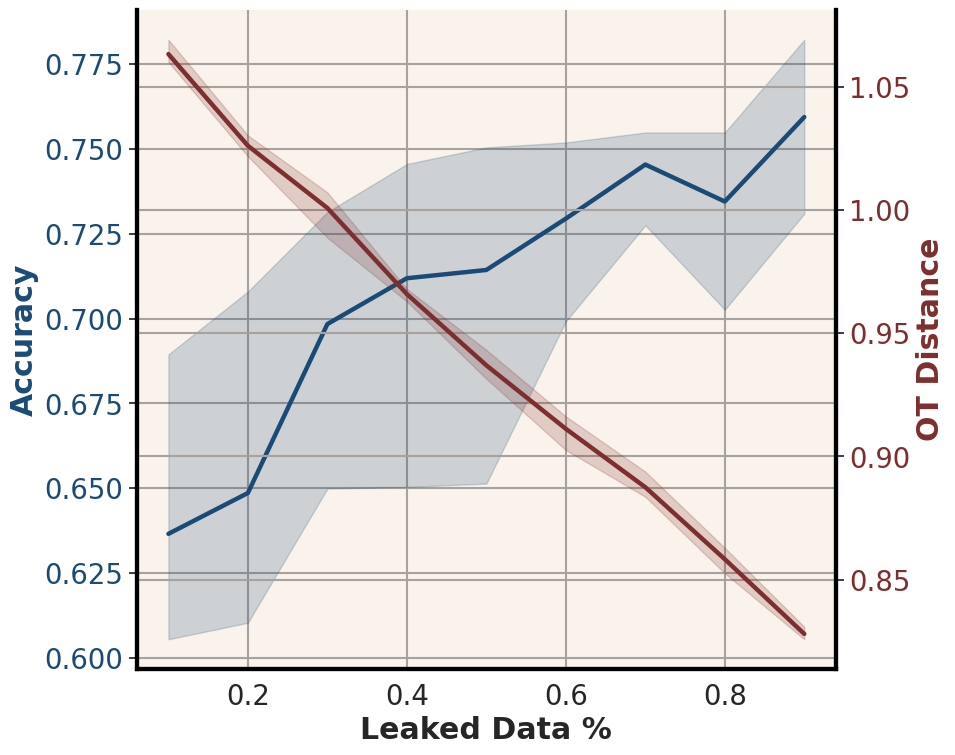

In [1046]:
# test line graph
import seaborn as sns
import matplotlib.pyplot as plt

from utils.plot_utils import _init_plot

grid_color = "#A8A29E"
color1 = "#1A4B77"
color2 = "#7D2E2E"
line_width = 3.2


_init_plot()

dv_cols = ["ratio"]
# iv_cols = ["evaluation_best_eval_accuracy", "dataset_full_ot_distance"]
iv_cols = ["evaluation_best_eval_accuracy", "dataset_containment_similarity_examples"]


# Final results: dataset size 1000, batch fill strategy is not bottomk
fig, ax1 = plt.subplots(figsize=(10, 8))
sns.set_theme(style="whitegrid", 
    font_scale=1.8, #font=font_name, 
    context="notebook", 
    rc={
        "axes.facecolor": (250/255, 243/255, 235/255, 1.0),
        "grid.color": grid_color, 
        "grid.linewidth": 1.5
    },
)

# Plot first line (accuracy) on primary y-axis
dfg = df[df["select_batch_fill_strategy"] == "topk_balanced"]
sns.lineplot(data=dfg, x="ratio", y="evaluation_best_eval_accuracy", lw=line_width, ax=ax1, color=color1)
ax1.set_xlabel('Leaked Data %', fontweight="bold", labelpad=4)
ax1.set_ylabel('Accuracy', color=color1, fontweight="bold", labelpad=4)
ax1.tick_params(axis='y', labelcolor=color1)

# Create secondary y-axis and plot second line (OT distance)
ax2 = ax1.twinx()
sns.lineplot(data=dfg, x="ratio", y="dataset_full_ot_distance", ax=ax2, lw=line_width, color=color2)
ax2.set_ylabel('OT Distance', color=color2, fontweight="bold", labelpad=4)
ax2.tick_params(axis='y', labelcolor=color2)


for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # Customize ticks
    # ax.xaxis.set_ticks_position('bottom')
    # ax.yaxis.set_ticks_position('left')
    border_width = 3.0
    border_color = 'black'
    ax.spines['top'].set_linewidth(border_width)
    ax.spines['top'].set_edgecolor(border_color)
    ax.spines['right'].set_linewidth(border_width)
    ax.spines['right'].set_edgecolor(border_color)
    ax.spines['left'].set_linewidth(border_width)
    ax.spines['left'].set_edgecolor(border_color)
    ax.spines['bottom'].set_linewidth(border_width)
    ax.spines['bottom'].set_edgecolor(border_color)

    # remove leg
    try:
        ax.get_legend().remove()
    except AttributeError:
        continue

plt.tight_layout()
plt.savefig(
    "/home/jxm/reverse-training/figures/leakage.pdf", 
    format='pdf', 
    bbox_inches='tight', 
    dpi=300,
)
plt.show()